Check the alt-az distribution for each filter and proposal

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [9]:
outDir = 'AltAz'
resultsDb = db.ResultsDb(outDir=outDir)
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
propids, propTags = opsdb.fetchPropInfo()
filters = ['u','g','r','i','z','y']

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression '' should be explicitly declared as text('') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression "paramName like 'ScienceTy..." should be explicitly declared as text("paramName like 'ScienceTy...") (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint filter="u" and propID=362
Found 6900 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="u" and propID=362 sqlconstraint now.
Plotting complete.
Querying database with constraint filter="u" and propID=363
Found 8790 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="u" and propID=363 sqlconstraint now.
Plotting complete.
Querying database with constraint filter="u" and propID=364
Found 145258 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="u" and propID=364 sqlconstraint now.
Plotting complete.
Querying database with constraint filter="u" and propID=365
No data matching sqlconstraint filter="u" and propID=

MetricBundle (fileRoot=opsim_Nvisits_as_function_of_Alt_Az_u_NorthEclipticSpur-18c_HEAL) has no attribute metricValues Either it has not been calculated or it has been deleted.
MetricBundle (fileRoot=opsim_Nvisits_as_function_of_Alt_Az_y_NorthEclipticSpur-18c_HEAL) has no attribute metricValues Either it has not been calculated or it has been deleted.



Querying database with constraint filter="y" and propID=365
No data matching sqlconstraint filter="y" and propID=365
Plotting figures with filter="y" and propID=365 sqlconstraint now.
Plotting complete.
Querying database with constraint filter="y" and propID=366
Found 17154 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="y" and propID=366 sqlconstraint now.
Plotting complete.


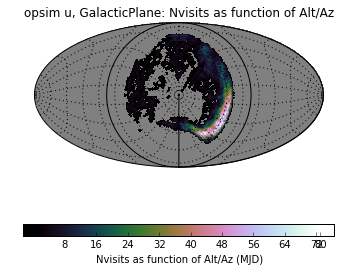

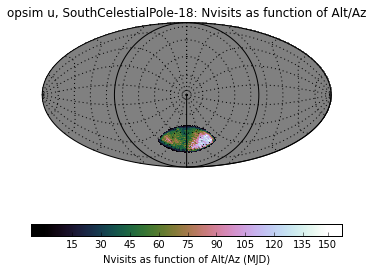

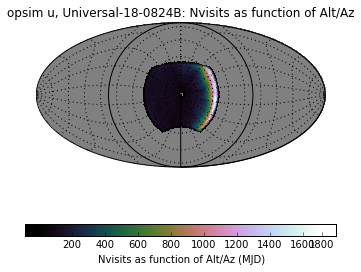

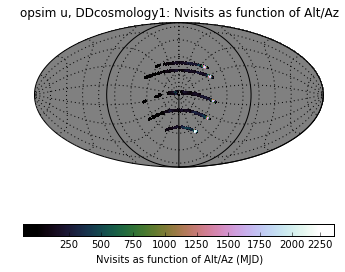

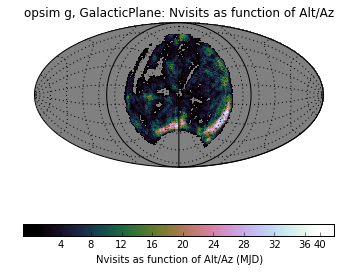

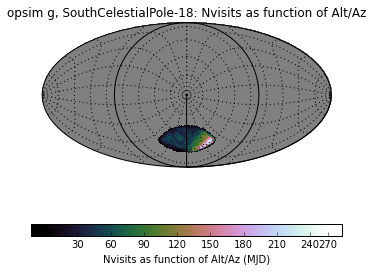

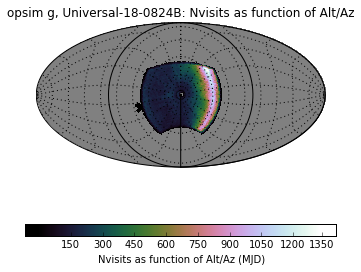

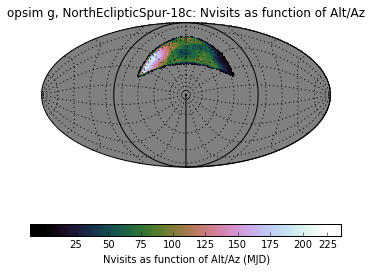

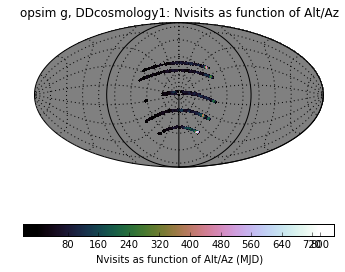

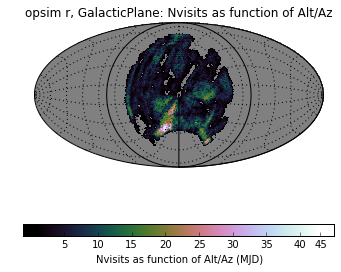

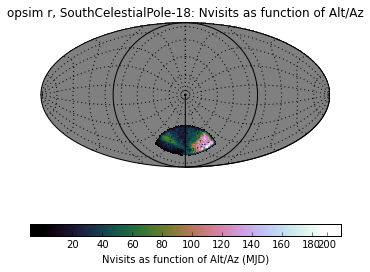

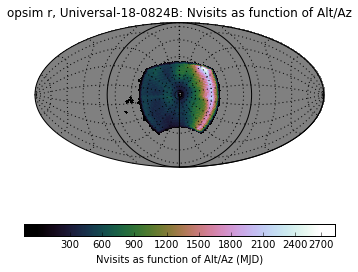

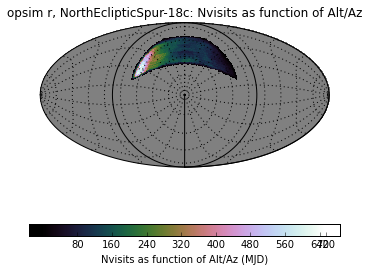

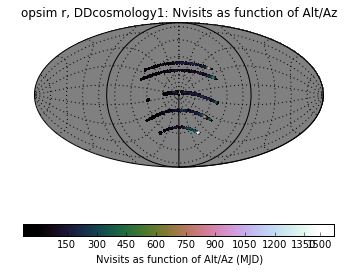

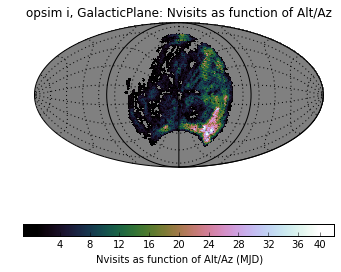

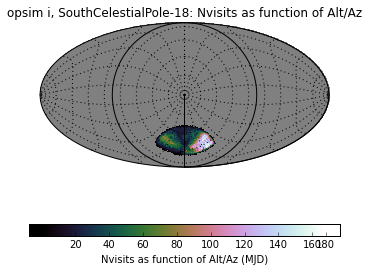

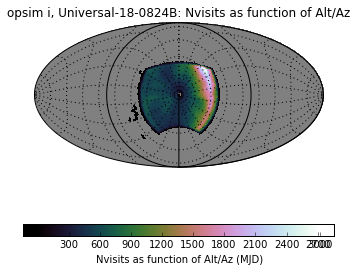

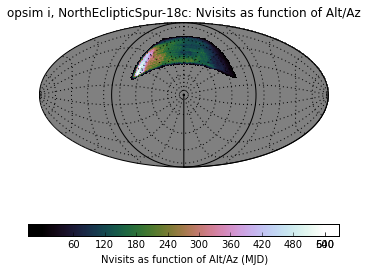

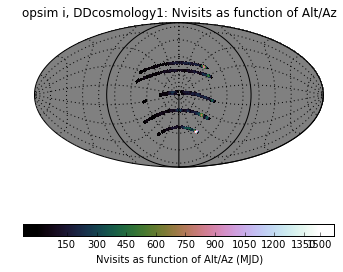

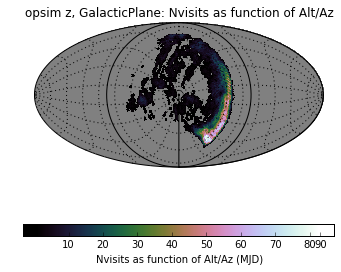

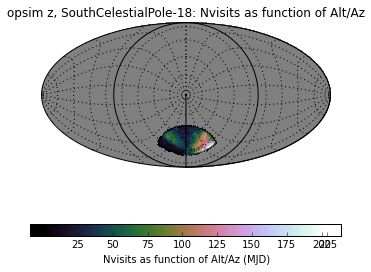

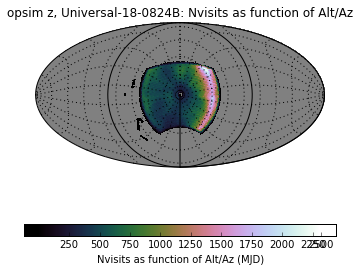

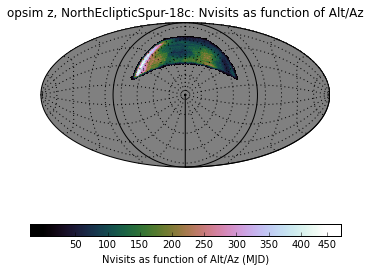

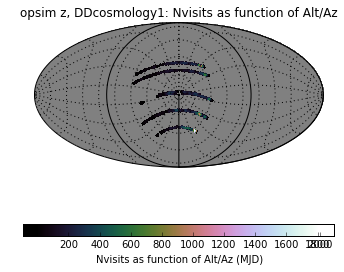

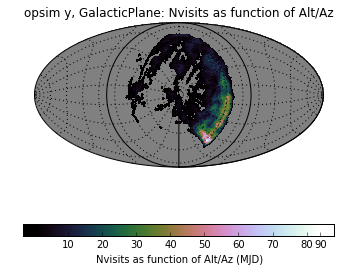

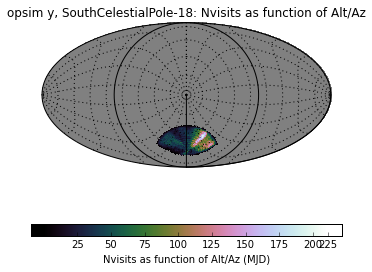

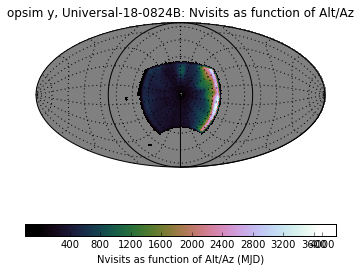

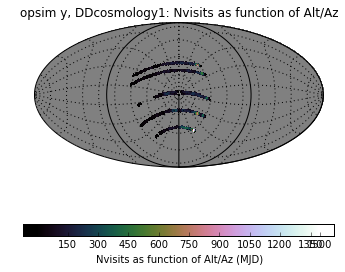

In [16]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {'rot':(0,90,0)}
plotFuncs = [plots.HealpixSkyMap()]
bundleList = []
for filt in filters:
    for propid in propids:
        md = '%s, %s' % (filt, propids[propid])
        sql = 'filter="%s" and propID=%i' % (filt,propid)
        bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict,
                                            plotFuncs=plotFuncs, metadata=md)
        group = metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                                outDir=outDir, resultsDb=resultsDb)
        group.runAll()
        group.plotAll(closefigs=False)